In [12]:
import pandas as pd
import os
import io

In [10]:
from google.colab import files
  
  
uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction (1).csv


In [13]:
df = pd.read_csv(io.BytesIO(uploaded['SolarPrediction.csv']))
print(df)

print(df.shape)
df.head()

         UNIXTime                   Data  ... TimeSunRise  TimeSunSet
0      1475229326  9/29/2016 12:00:00 AM  ...    06:13:00    18:13:00
1      1475229023  9/29/2016 12:00:00 AM  ...    06:13:00    18:13:00
2      1475228726  9/29/2016 12:00:00 AM  ...    06:13:00    18:13:00
3      1475228421  9/29/2016 12:00:00 AM  ...    06:13:00    18:13:00
4      1475228124  9/29/2016 12:00:00 AM  ...    06:13:00    18:13:00
...           ...                    ...  ...         ...         ...
32681  1480587604  12/1/2016 12:00:00 AM  ...    06:41:00    17:42:00
32682  1480587301  12/1/2016 12:00:00 AM  ...    06:41:00    17:42:00
32683  1480587001  12/1/2016 12:00:00 AM  ...    06:41:00    17:42:00
32684  1480586702  12/1/2016 12:00:00 AM  ...    06:41:00    17:42:00
32685  1480586402  12/1/2016 12:00:00 AM  ...    06:41:00    17:42:00

[32686 rows x 11 columns]
(32686, 11)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [14]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [15]:


df = df.sort_values(['UNIXTime'], ascending = [True])
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')

print(df.index)

df.head()

DatetimeIndex(['2016-09-01 10:00:08', '2016-09-01 10:05:10',
               '2016-09-01 10:20:06', '2016-09-01 10:25:05',
               '2016-09-01 10:30:09', '2016-09-01 10:45:04',
               '2016-09-01 10:50:06', '2016-09-01 10:55:04',
               '2016-09-01 11:00:07', '2016-09-01 11:05:05',
               ...
               '2017-01-01 09:10:02', '2017-01-01 09:15:02',
               '2017-01-01 09:20:04', '2017-01-01 09:25:01',
               '2017-01-01 09:30:02', '2017-01-01 09:35:02',
               '2017-01-01 09:40:01', '2017-01-01 09:45:04',
               '2017-01-01 09:50:03', '2017-01-01 09:55:01'],
              dtype='datetime64[ns]', name='UNIXTime', length=32686, freq=None)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 10:00:08,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 10:05:10,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 10:20:06,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 10:25:05,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 10:30:09,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [16]:
import pytz

HST = pytz.timezone('Pacific/Honolulu')
                                                                                ## unixtime is in utc
df.index = df.index.tz_localize(pytz.utc)                                       ## we can see that by comparing with "Time",
df.index = df.index.tz_convert(HST)                                             ## converting to hawaiian local time
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [17]:
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear
UNIXTime,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245


In [18]:
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245,8
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245,310
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245,1206
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245,1505
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245,1809


In [19]:
df.drop(['TimeSunRise','TimeSunSet', 'Data', 'Time', 'WindDirection(Degrees)'], inplace=True, axis=1)

df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Speed,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,11.25,245,8
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,9.00,245,310
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,7.87,245,1206
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,18.00,245,1505
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,11.25,245,1809


In [20]:
print(df.shape)

(32686, 8)


In [21]:
dataset = df.values

X = dataset[:,2:8]
Y = dataset[:,1]
Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))

(32686, 6)
(32686, 1)
<class 'numpy.ndarray'>


In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26148, 6) (3269, 6) (3269, 6) (26148, 1) (3269, 1) (3269, 1)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


model = Sequential()
model.add(Dense(64, activation='relu',  kernel_initializer='normal', input_shape=(6,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [26]:
from tensorflow.keras.optimizers import Adam



model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=300,
                validation_data=(X_val, Y_val))

Epoch 1/300
818/818 [==============================] - 4s 4ms/step - loss: 0.6719 - mae: 0.2891 - val_loss: 0.2500 - val_mae: 0.2224
Epoch 2/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2536 - mae: 0.2370 - val_loss: 0.2380 - val_mae: 0.2193
Epoch 3/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2438 - mae: 0.2322 - val_loss: 0.2298 - val_mae: 0.2101
Epoch 4/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2413 - mae: 0.2321 - val_loss: 0.2314 - val_mae: 0.2260
Epoch 5/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2335 - mae: 0.2275 - val_loss: 0.2269 - val_mae: 0.1956
Epoch 6/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2325 - mae: 0.2282 - val_loss: 0.2202 - val_mae: 0.2008
Epoch 7/300
818/818 [==============================] - 3s 4ms/step - loss: 0.2335 - mae: 0.2290 - val_loss: 0.2372 - val_mae: 0.2581
Epoch 8/300
818/818 [==============================] - 3s 4ms/step - 

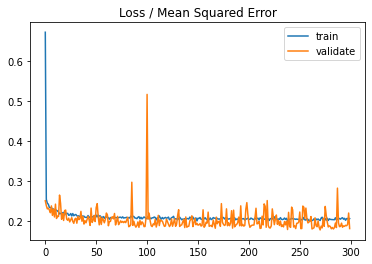

In [27]:
from matplotlib import pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

 loss plot showing the decrease of mse over the number of training epochs for the training and validation sets
 :

In [28]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 1ms/step - loss: 0.1721 - mae: 0.1981


[0.1721314936876297, 0.198129802942276]

In [29]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

[[15.288089]
 [15.288089]
 [15.288089]
 ...
 [15.288089]
 [15.288089]
 [21.74051 ]]
[[1.24]
 [1.23]
 [1.21]
 ...
 [1.2 ]
 [1.24]
 [2.42]]


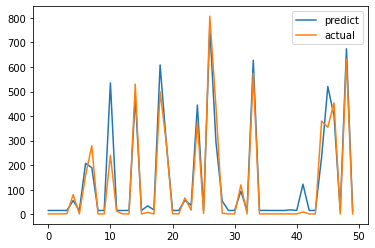

In [34]:
import numpy as np

axis_x = [i for i in range(50)]


pyplot.plot(axis_x, Y_result[:(50)], label='predict')
pyplot.plot(axis_x, Y_test_unscaled[:50], label='actual')
pyplot.legend()
pyplot.show()

In [35]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.881462204367418
mse = 12496.282985714372
r2 = 0.8753130783633626


Comparaison between our Linear Regression Prediction and Neural Network, we can see that: 


- For Linear Regression: 

mse = 38256.791253197094

R2 = 0.6236612710196506

- For Neural Network:

explained variance = 0.881462204367418

mse = 12496.282985714372

r2 = 0.8753130783633626
